(64, 64)


(-0.5, 63.5, 63.5, -0.5)

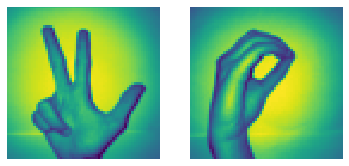

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
x = np.load('input/Sign-language-digits-dataset/X.npy')
y = np.load('input/Sign-language-digits-dataset/Y.npy')
img_size = 64
plt.subplot(1,2,1)
plt.imshow(x[1500].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
print(x[250].reshape(img_size,img_size).shape)
plt.imshow(x[250].reshape(img_size,img_size))
plt.axis('off')

In [75]:
# As you can see, y (labels) are already one hot encoded
print(y.max())
print(y.min())
print(x[300])
print(y[300])
print(x[400])
print(y[400])

# And x (features) are already scaled between 0 and 1
print(x.max())
print(x.min())
print(x.shape)

1.0
0.0
[[0.5019608  0.5137255  0.52156866 ... 0.5372549  0.5254902  0.5137255 ]
 [0.50980395 0.52156866 0.53333336 ... 0.5411765  0.5294118  0.5176471 ]
 [0.5137255  0.5254902  0.5411765  ... 0.54901963 0.53333336 0.5254902 ]
 ...
 [0.49411765 0.5019608  0.5058824  ... 0.49803922 0.49019608 0.4745098 ]
 [0.4862745  0.49411765 0.5019608  ... 0.49019608 0.48235294 0.47058824]
 [0.47843137 0.48235294 0.49019608 ... 0.47843137 0.47058824 0.45882353]]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.84705883 0.85882354 0.85882354 ... 0.8509804  0.84313726 0.83137256]
 [0.8509804  0.85882354 0.8627451  ... 0.84705883 0.84313726 0.83137256]
 [0.85490197 0.8627451  0.8627451  ... 0.8509804  0.84705883 0.8392157 ]
 ...
 [0.73333335 0.74509805 0.74509805 ... 0.7490196  0.74509805 0.7372549 ]
 [0.7137255  0.72156864 0.72156864 ... 0.74509805 0.73333335 0.7294118 ]
 [0.6784314  0.6862745  0.6901961  ... 0.73333335 0.7294118  0.7254902 ]]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
0.003921569
(2062, 64, 64)


In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#reshape
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)
#print x_train and y_train shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#Data Augumentation to increase the number of parameters to avoid underfitting
datagen = ImageDataGenerator(
    rotation_range=16,
    width_shift_range=0.12,
    height_shift_range=0.12,
    zoom_range=0.12
    )
datagen.fit(x_train)
print(x_train.shape)

(1649, 64, 64, 1)
(1649, 10)
(413, 64, 64, 1)
(413, 10)
(1649, 64, 64, 1)


In [77]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size = (2,2)))
#dropout To reduce overfitting model when Validation loss > Training loss
model.add(Dropout(0.25))
#Normalize the output with zero mean and unit variance
model.add(BatchNormalization())

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())


# fully connected
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [78]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 64, 64, 8)         208       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 16)       

In [79]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

#Training will stop when the chosen performance measure stops improving after 25 epochs
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#we are interested in only the very best model observed during training, rather than the best compared to the previous epoch, which might not be the best overall if training is noisy. 
#Ensure to asve best model in best_model.h5
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),callbacks=[es,mc])

Train on 1649 samples, validate on 413 samples
Epoch 1/100
1649/1649 [==============================] - 7s 4ms/step - loss: 2.1220 - accuracy: 0.2408 - val_loss: 2.4483 - val_accuracy: 0.0775

Epoch 00001: val_accuracy improved from -inf to 0.07748, saving model to best_model.h5
Epoch 2/100
1649/1649 [==============================] - 6s 4ms/step - loss: 1.3005 - accuracy: 0.5282 - val_loss: 2.4802 - val_accuracy: 0.0775

Epoch 00002: val_accuracy did not improve from 0.07748
Epoch 3/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.8992 - accuracy: 0.6780 - val_loss: 2.5951 - val_accuracy: 0.0775

Epoch 00003: val_accuracy did not improve from 0.07748
Epoch 4/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.6681 - accuracy: 0.7653 - val_loss: 2.5941 - val_accuracy: 0.0993

Epoch 00004: val_accuracy improved from 0.07748 to 0.09927, saving model to best_model.h5
Epoch 5/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.502

1649/1649 [==============================] - 6s 4ms/step - loss: 0.0604 - accuracy: 0.9800 - val_loss: 0.1018 - val_accuracy: 0.9637

Epoch 00039: val_accuracy did not improve from 0.97821
Epoch 40/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0469 - accuracy: 0.9824 - val_loss: 0.1099 - val_accuracy: 0.9564

Epoch 00040: val_accuracy did not improve from 0.97821
Epoch 41/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0323 - accuracy: 0.9915 - val_loss: 0.0700 - val_accuracy: 0.9685

Epoch 00041: val_accuracy did not improve from 0.97821
Epoch 42/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0202 - accuracy: 0.9927 - val_loss: 0.0593 - val_accuracy: 0.9782

Epoch 00042: val_accuracy did not improve from 0.97821
Epoch 43/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.0446 - accuracy: 0.9873 - val_loss: 0.0843 - val_accuracy: 0.9661

Epoch 00043: val_accuracy did not improve from 0.97821
Epo

In [80]:
# Saved model which contains val_loss,val_acc,train_loss,train_acc for each iterations
history.history

{'val_loss': [2.448324403809,
  2.480192534860052,
  2.5951103026872686,
  2.59407406626833,
  2.2987760845165854,
  1.946127278464181,
  1.8079159753374556,
  1.1861148281767062,
  1.1438392646087572,
  0.5746314275928618,
  0.687356771553977,
  0.14998527627086525,
  0.13606406520086975,
  0.20874241082850148,
  0.22647374083646563,
  0.22061628216007143,
  0.11567259230256333,
  0.1427102693904543,
  0.14874218038078083,
  0.08699641038932032,
  0.08902507809331284,
  0.10390923725165986,
  0.08018372817073224,
  0.06593384072308589,
  0.08952323347555595,
  0.18562584985543684,
  0.08572299764480343,
  0.10717568473809243,
  0.08144216252193216,
  0.0503587656010046,
  0.10269746443732544,
  0.1456319609066115,
  0.082439441680367,
  0.06982016302960908,
  0.1316618217385349,
  0.09595749415930803,
  0.11981568620574026,
  0.07093869899422128,
  0.10182302569424774,
  0.10992592161286793,
  0.07001118982981971,
  0.05929868294886757,
  0.08432328825496299,
  0.08820686058684468,
  

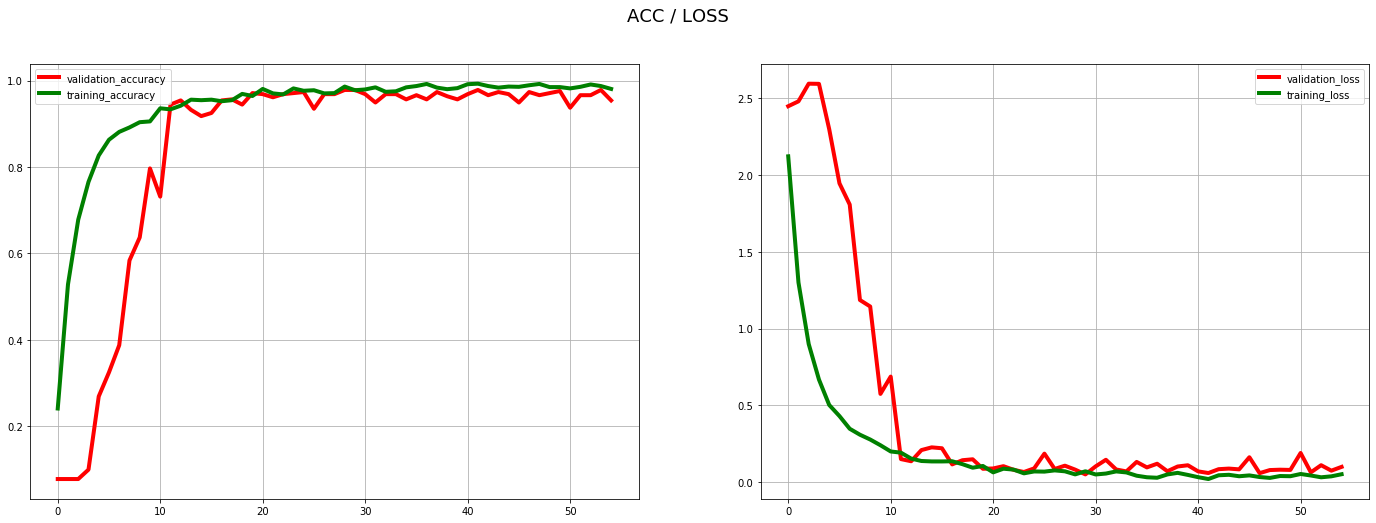

In [81]:
#Plot Training Loss and Validation Loss
# Training Loss < Validation Loss=Overfitting
# Training Loss < Validation Loss=Underfitting
# Training Loss ~= Validation Loss=Perfect

plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"], label="validation_accuracy", c="red", linewidth=4)
plt.plot(history.history["accuracy"], label="training_accuracy", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history["val_loss"], label="validation_loss", c="red", linewidth=4)
plt.plot(history.history["loss"], label="training_loss", c="green", linewidth=4)
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()


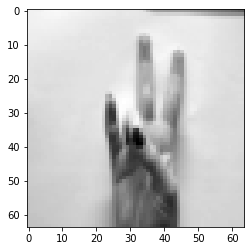

In [82]:
test_image = x_test[100]
test_image_array = test_image.reshape(64, 64)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

plt.imshow(test_image_array, cmap='gray')

In [83]:
print(np.round(result, 2))
print(y_test[100])

[[0.   0.   0.65 0.   0.   0.34 0.   0.   0.   0.  ]]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [84]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
json_model = model.to_json()
#save the model architecture to JSON file
with open('sign_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('sign_weights.h5')
#Model loss and accuracy
#loss,acc = model.evaluate(test_images,  test_labels, verbose=2)


In [85]:
with open('sign_model.json', 'r') as json_file:
    json_savedModel= json_file.read()
    model_j=model_from_json(json_savedModel)
#load the model architecture 
model_j.load_weights('sign_weights.h5')
model_j.summary()
#Reuse the same model or train with different dataset and optimization techniques
           


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 64, 64, 8)         208       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 32, 8)         0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 8)         32        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 16)        1168      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 16)       

In [ ]:
#Deserialize the model and fit the same model in different dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)
#reshape
x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)
#optimizer=optimizers.RMSprop(lr=0.0001)
optimizer = RMSprop(lr=0.0001)
model_j.compile(loss="categorical_crossentropy",
                             optimizer=optimizer,
                             metrics=["accuracy"])
history = model_j.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))


train_scores = model_j.evaluate(x_train, y_train, verbose=0)
test_scores  = model_j.evaluate(x_test, y_test, verbose=0)
print("Train accuracy:{:.3f}".format(train_scores[1]))
print("Test accuracy:{:.3f}".format(test_scores[1]))


        
       

Train on 1649 samples, validate on 413 samples
Epoch 1/100
1649/1649 [==============================] - 8s 5ms/step - loss: 0.0501 - accuracy: 0.9836 - val_loss: 0.0378 - val_accuracy: 0.9831
Epoch 2/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0454 - accuracy: 0.9848 - val_loss: 0.0225 - val_accuracy: 0.9903
Epoch 3/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.0329 - accuracy: 0.9873 - val_loss: 0.0189 - val_accuracy: 0.9927
Epoch 4/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0294 - accuracy: 0.9927 - val_loss: 0.0167 - val_accuracy: 0.9927
Epoch 5/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0190 - accuracy: 0.9927 - val_loss: 0.0130 - val_accuracy: 0.9952
Epoch 6/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.0237 - accuracy: 0.9909 - val_loss: 0.0130 - val_accuracy: 0.9927
Epoch 7/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0270

Epoch 57/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0177 - val_accuracy: 0.9903
Epoch 58/100
1649/1649 [==============================] - 6s 4ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0131 - val_accuracy: 0.9903
Epoch 59/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0110 - accuracy: 0.9951 - val_loss: 0.0182 - val_accuracy: 0.9903
Epoch 60/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.0162 - val_accuracy: 0.9879
Epoch 61/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0157 - val_accuracy: 0.9927
Epoch 62/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0064 - accuracy: 0.9982 - val_loss: 0.0188 - val_accuracy: 0.9879
Epoch 63/100
1649/1649 [==============================] - 7s 4ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 0.0144 -